In [208]:
#Import Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as sns


#Me-Generate Nama File dengan format'/kaggle/input/<file>'
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uas-abi-rahmawan-v3921001/Jan_2019_ontime.csv


In [209]:
#Membaca File
df = pd.read_csv("/kaggle/input/uas-abi-rahmawan-v3921001/Jan_2019_ontime.csv")

#Menampilkan data
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


In [210]:
#Hapus beberapa kolom
df = df.drop(columns=['DAY_OF_MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','OP_CARRIER','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','DEP_TIME_BLK','ARR_TIME','CANCELLED','DIVERTED','DISTANCE'])

dataframe = df.head(200)

#Tampilkan 5 data teratas
dataframe.head()

,ORIGIN,DEST,DEP_TIME,DEP_DEL15,ARR_DEL15
0,GNV,ATL,601.0,0.0,0.0
1,MSP,CVG,1359.0,0.0,0.0
2,DTW,CVG,1215.0,0.0,0.0
3,TLH,ATL,1521.0,0.0,0.0
4,ATL,FSM,1847.0,0.0,0.0


In [211]:
X = dataframe.iloc[:,0:4].values
Y = dataframe.iloc[:,4].values

In [212]:
from sklearn.preprocessing import LabelEncoder 

#Melakukan perubahan data
labEn = LabelEncoder()
X[:, 0] = labEn.fit_transform(X[:, 0])
X[:, 1] = labEn.fit_transform(X[:, 1])

#Menampilkan data yang diubah
print(X)

[[31 3 601.0 0.0]
 [51 19 1359.0 0.0]
 [25 19 1215.0 0.0]
 [65 3 1521.0 0.0]
 [3 29 1847.0 0.0]
 [21 53 853.0 0.0]
 [39 3 1553.0 0.0]
 [45 19 1551.0 0.0]
 [40 47 1037.0 0.0]
 [3 7 1245.0 0.0]
 [6 3 1410.0 0.0]
 [12 3 557.0 0.0]
 [25 21 1552.0 0.0]
 [51 21 2029.0 0.0]
 [55 23 1312.0 0.0]
 [41 61 1450.0 0.0]
 [25 27 1353.0 1.0]
 [2 3 1148.0 0.0]
 [3 2 1020.0 0.0]
 [25 19 817.0 0.0]
 [46 3 1523.0 0.0]
 [38 53 1111.0 0.0]
 [3 55 2216.0 0.0]
 [3 30 1554.0 0.0]
 [31 3 1740.0 0.0]
 [3 28 1101.0 0.0]
 [29 3 1332.0 0.0]
 [51 20 1349.0 0.0]
 [11 3 807.0 0.0]
 [20 23 834.0 0.0]
 [2 3 1637.0 0.0]
 [3 2 1516.0 0.0]
 [3 13 1242.0 0.0]
 [3 51 1957.0 0.0]
 [66 3 1136.0 0.0]
 [8 8 1739.0 0.0]
 [3 49 2111.0 0.0]
 [3 2 2230.0 0.0]
 [48 3 653.0 0.0]
 [47 23 1305.0 0.0]
 [49 53 1518.0 0.0]
 [25 70 1542.0 0.0]
 [68 23 1755.0 0.0]
 [30 3 1550.0 0.0]
 [3 57 2009.0 0.0]
 [3 6 854.0 0.0]
 [5 3 931.0 0.0]
 [25 5 1234.0 0.0]
 [25 45 2036.0 0.0]
 [3 71 2210.0 0.0]
 [45 58 1755.0 0.0]
 [45 43 1627.0 0.0]
 [39 3 727

In [213]:
#Split data atau memisahkan data menjadi tseparate training dan test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

#Menampilkan data x_test
print(x_test)

[[3 2 1020.0 0.0]
 [16 44 1556.0 0.0]
 [25 65 832.0 0.0]
 [3 63 1047.0 0.0]
 [3 55 1225.0 0.0]
 [25 16 1545.0 0.0]
 [21 53 853.0 0.0]
 [51 19 1934.0 0.0]
 [25 21 1552.0 0.0]
 [13 3 1013.0 0.0]
 [7 9 2034.0 0.0]
 [3 40 1023.0 0.0]
 [45 19 958.0 1.0]
 [36 53 1659.0 0.0]
 [0 3 557.0 0.0]
 [45 19 1551.0 0.0]
 [3 51 1957.0 0.0]
 [26 23 1252.0 0.0]
 [3 2 2230.0 0.0]
 [47 3 1156.0 0.0]
 [1 3 1732.0 0.0]
 [25 41 816.0 0.0]
 [3 6 854.0 0.0]
 [3 68 2226.0 0.0]
 [11 3 1049.0 0.0]
 [4 53 1613.0 0.0]
 [3 66 1615.0 0.0]
 [3 1 859.0 0.0]
 [25 32 2023.0 0.0]
 [3 57 2009.0 0.0]
 [25 27 1353.0 1.0]
 [19 53 817.0 1.0]
 [3 34 1011.0 0.0]
 [3 4 1215.0 0.0]
 [3 55 2216.0 0.0]
 [14 3 1415.0 0.0]
 [58 53 957.0 1.0]
 [3 29 1847.0 0.0]
 [10 44 1835.0 0.0]
 [51 19 1100.0 1.0]]


In [214]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
x_train = std_sc.fit_transform(x_train)
x_test = std_sc.fit_transform(x_test)

print(x_train)

[[-1.24610711  1.59743505 -0.8515001  -0.25819889]
 [ 0.87242209 -1.19033249  0.29514255  3.87298335]
 [-0.02206801 -1.19033249  0.10403544 -0.25819889]
 [-0.21038172 -0.26107664 -1.129694   -0.25819889]
 [-0.21038172  0.49117809  0.61204168 -0.25819889]
 [ 0.68410839 -1.19033249 -1.7804258  -0.25819889]
 [ 0.49579468  0.75667976 -0.60959237 -0.25819889]
 [ 1.01365737  1.15493227 -0.84666195  3.87298335]
 [-0.25746015  1.02218143 -1.06195983 -0.25819889]
 [ 1.01365737 -0.3495772  -0.43299972 -0.25819889]
 [ 1.01365737 -0.3495772   0.54430752 -0.25819889]
 [-0.30453857 -0.30532692 -0.39913264 -0.25819889]
 [-1.34026396 -1.19033249 -0.62652591 -0.25819889]
 [ 1.24904951 -1.19033249 -1.79010211 -0.25819889]
 [-0.21038172  1.77443617  1.80948496 -0.25819889]
 [ 0.07208884 -1.19033249  1.091019   -0.25819889]
 [-1.29318553 -1.19033249  0.84185403 -0.25819889]
 [-1.24610711 -1.01333138  1.08376176 -0.25819889]
 [ 0.91950052  1.02218143  0.55398383 -0.25819889]
 [-1.24610711  0.2699267   0.79

In [215]:
#Model training
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [216]:
#Memprediksi hasil

y_pred = gnb.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [217]:
#Lakukan pengecekan nilai akurasi
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8250


In [218]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

c_mtx = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', c_mtx)

print('\nKeterangan :')
print('TP (True Positives)\t= ', c_mtx[0,0])
print('TN (True Negatives)\t= ', c_mtx[1,1])
print('FP (False Positives)\t= ', c_mtx[0,1])
print('FN (False Negatives)\t= ', c_mtx[1,0])

Confusion matrix

 [[32  0]
 [ 7  1]]

Keterangan :
TP (True Positives)	=  32
TN (True Negatives)	=  1
FP (False Positives)	=  0
FN (False Negatives)	=  7


<AxesSubplot:>

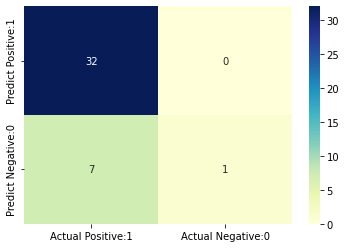

In [219]:
#Visualisasi Confussion Matrix dengan Seaborn Heatmap

c_matrix = pd.DataFrame(data=c_mtx, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(c_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [220]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        32
         1.0       1.00      0.12      0.22         8

    accuracy                           0.82        40
   macro avg       0.91      0.56      0.56        40
weighted avg       0.86      0.82      0.77        40

